# Importing Libraries


In [1]:
# importing necassry libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Reading the data

In [2]:
# loading the data
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

In [6]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# looking for unique values
df['region'].nunique()

4

In [8]:
# comparing values per region
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [9]:
df['age'].nunique()

47

In [10]:
# most populated ages
df['age'].value_counts().head(5)

18    69
19    68
20    29
51    29
45    29
Name: age, dtype: int64

# Data Visualization

<Figure size 864x576 with 0 Axes>

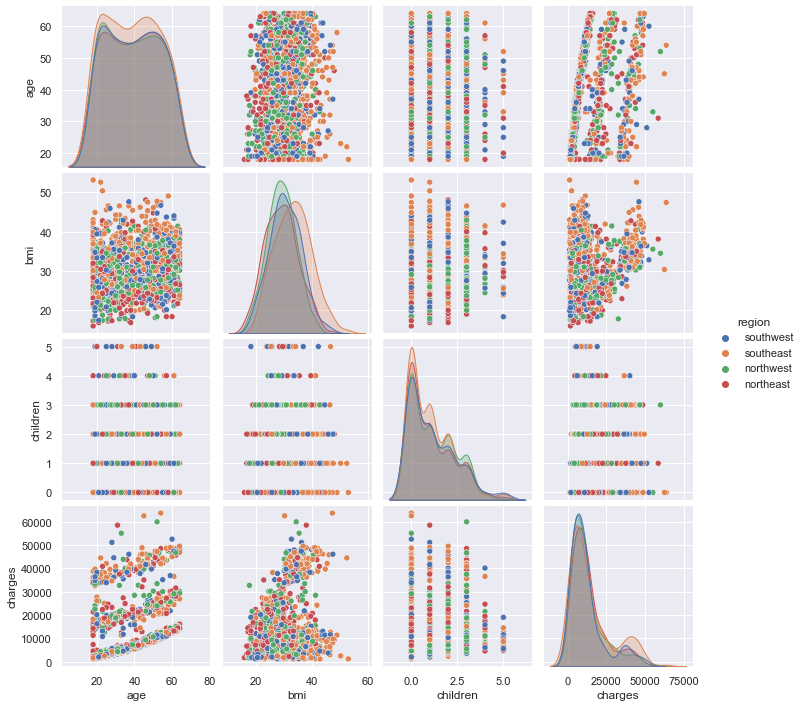

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='region')

<Figure size 864x576 with 0 Axes>

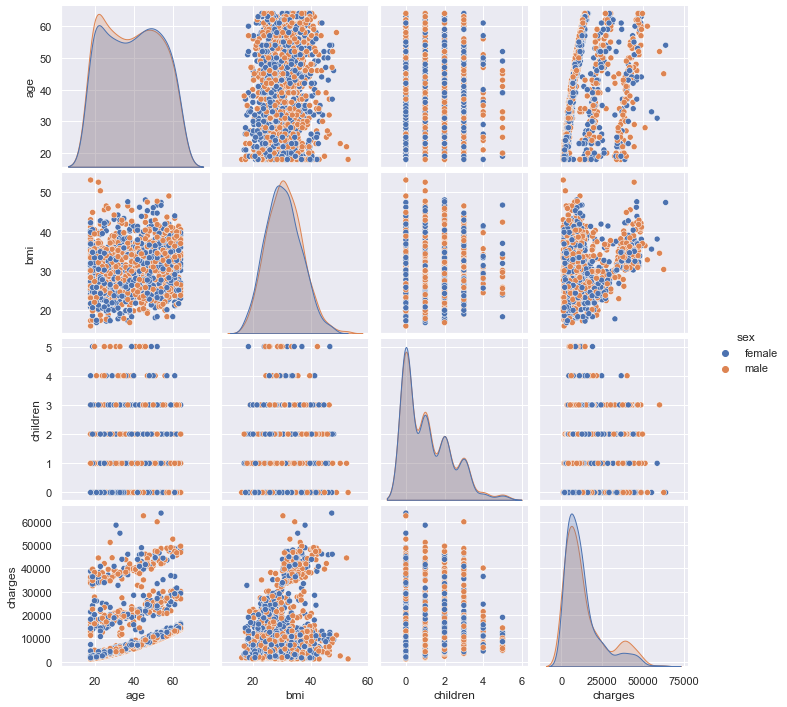

In [12]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='sex')

<Figure size 864x576 with 0 Axes>

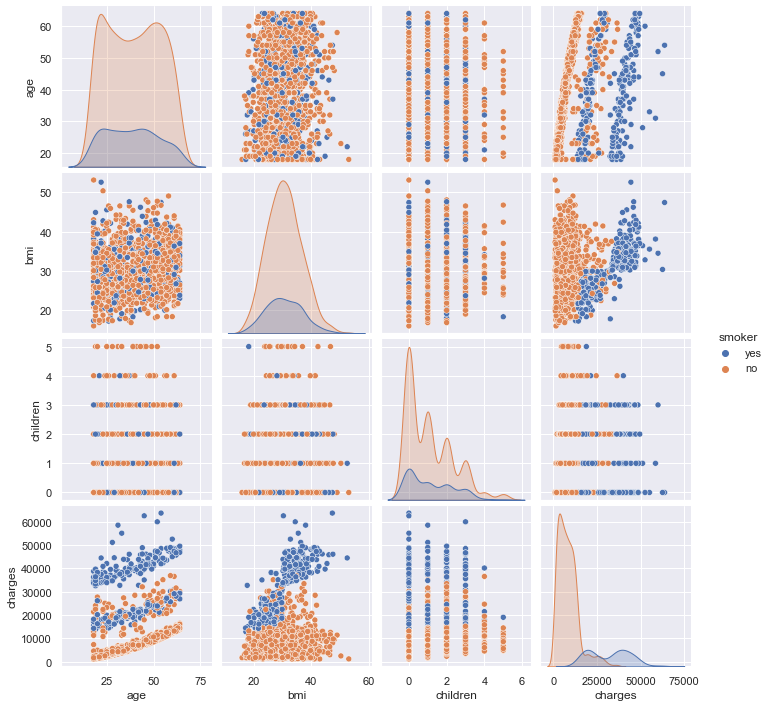

In [13]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='smoker')

<AxesSubplot:>

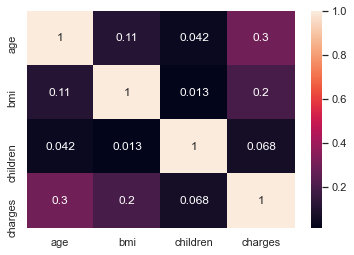

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

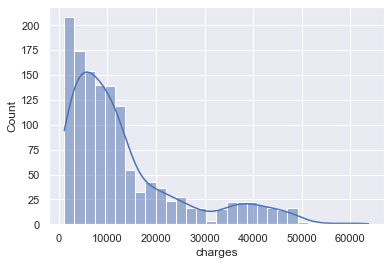

In [15]:
sns.histplot(df['charges'],kde=True)

<AxesSubplot:xlabel='smoker', ylabel='count'>

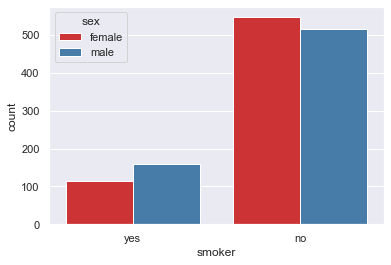

In [16]:
sns.countplot(x= 'smoker', data=df, hue='sex', palette = 'Set1')

<AxesSubplot:xlabel='sex', ylabel='count'>

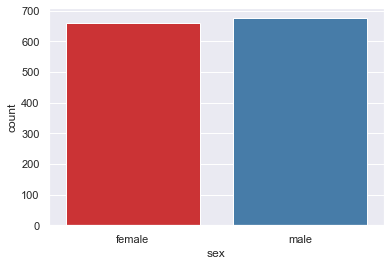

In [17]:
sns.countplot(x='sex', data=df, palette = 'Set1')

<AxesSubplot:xlabel='smoker', ylabel='count'>

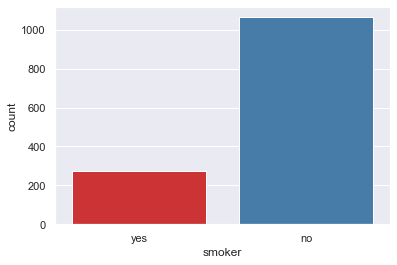

In [18]:
sns.countplot(x='smoker', data=df, palette = 'Set1')

<AxesSubplot:xlabel='region', ylabel='count'>

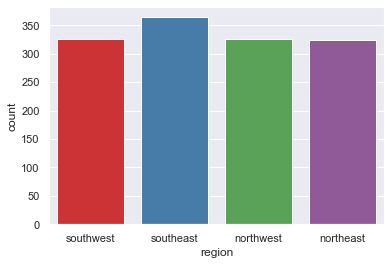

In [19]:
sns.countplot(x= 'region', data=df, palette = 'Set1')

<AxesSubplot:xlabel='region', ylabel='count'>

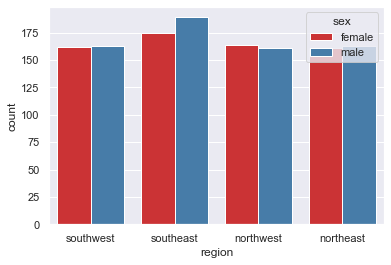

In [20]:
sns.countplot(x= 'region', data=df, hue='sex', palette = 'Set1')

<AxesSubplot:xlabel='region', ylabel='count'>

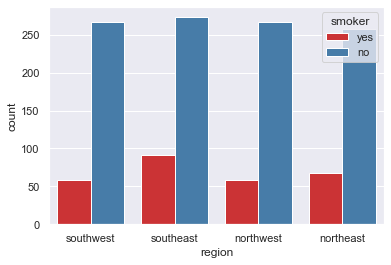

In [21]:
sns.countplot(x= 'region', data=df, hue='smoker', palette = 'Set1')

<AxesSubplot:xlabel='region', ylabel='charges'>

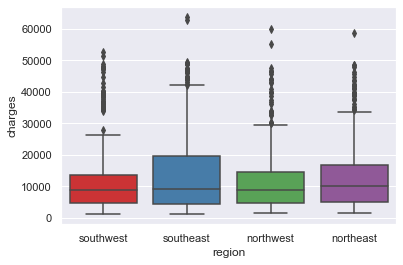

In [22]:
sns.boxplot(x="region", y="charges", data=df, palette = 'Set1')

In [23]:
# Converting Categorical Data to Numerical Data
region = pd.get_dummies(df['region'],drop_first = False)
df = pd.concat([df,region],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(4)
memory usage: 78.5+ KB


In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0


In [25]:
# Converting Categorical Data to Numerical Data
smoke = pd.get_dummies(df['smoker'],drop_first = True)
df = pd.concat([df,smoke],axis = 1)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,0


In [27]:
# Converting Categorical Data to Numerical Data
sex = pd.get_dummies(df['sex'],drop_first = True)
df = pd.concat([df,sex],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
 11  yes        1338 non-null   uint8  
 12  male       1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(6)
memory usage: 81.1+ KB


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,yes,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,0,1


In [29]:
# droping categorical columns
df = df.drop(['sex','smoker','region'], axis = 1)
df.head()

,age,bmi,children,charges,northeast,northwest,southeast,southwest,yes,male
0,19,27.900,0,16884.92400,0,0,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,0,1


<Figure size 864x720 with 0 Axes>

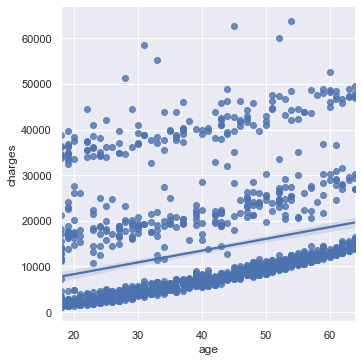

In [30]:
plt.figure(figsize=(12,10))
sns.lmplot(x='age',y='charges',data=df)

# 

# Train Test Split

In [37]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [43]:
print(lm.intercept_)

-12885.863070677458


In [44]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,241.278787
bmi,367.188753
children,494.290617
northeast,325.941699
northwest,495.767976
southeast,-267.003287
southwest,-554.706388
yes,23463.564869
male,52.135464


## Predictions from our Model

In [45]:
predictions = lm.predict(X_test)

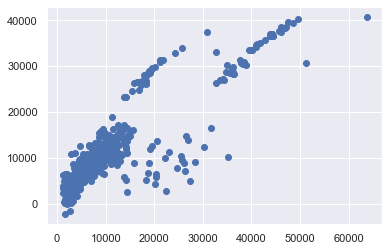

In [46]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='charges', ylabel='Count'>

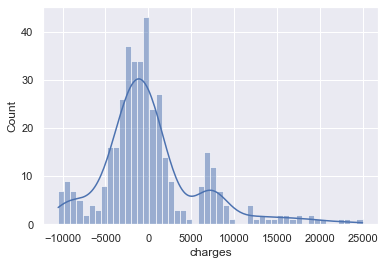

In [47]:
sns.histplot((y_test-predictions),kde=True, bins=50)

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 Score for Linear Regression on test data: {}'.format( np.round(r2_score(y_test, predictions), 3)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 Score for Linear Regression on test data: 0.76
MAE: 3987.9628476976295
MSE: 33683659.32465648
RMSE: 5803.762514494927


# Summary & Conclusion